In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline


In [272]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

<Axes: xlabel='casual', ylabel='Count'>

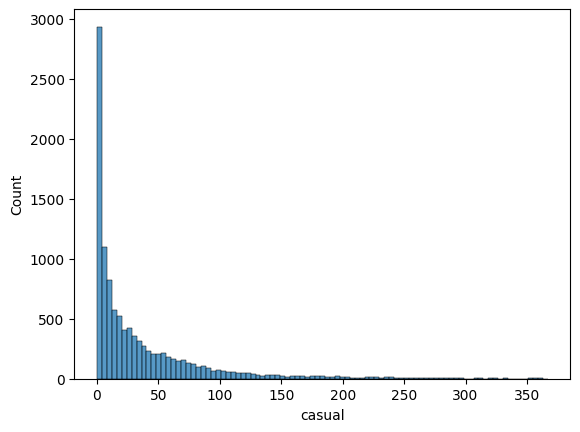

In [273]:
sns.histplot(bikes.casual)

In [274]:
bikes.casual.describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [275]:
def casual_category(x):
    if x >= 0 and x <= 4:
        return 0
    elif x > 4 and x <= 17:
        return 1
    elif x >17 and x <= 49:
        return 2
    elif x > 49:
        return 3

In [276]:
bikes['casual_cat'] = bikes['casual'].apply(casual_category)

In [277]:
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [278]:
bikes['hour'] = bikes['datetime'].dt.hour

In [279]:
bikes['month'] = bikes['datetime'].dt.month

In [280]:
bikes['day'] = bikes['datetime'].dt.day

In [281]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,casual_cat,hour,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0,4,1,1


In [292]:
x = np.array(bikes[['temp','humidity']])
y = np.array(bikes['casual_cat'])

In [288]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [294]:
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.fit_transform(x_test)

ValueError: all features must be in [0, 1] or [-2, 0]

In [286]:
x_train.shape

(8708, 3)

In [287]:
x_test.shape

(2178, 3)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(accuracy_score(y_pred, y_test))

0.49586776859504134


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# params knn
params_knn = {'n_neighbors': list(range(1,500)), 'weights': ['uniform', 'distance'], 'metric': ['l1', 'euclidean', 'manhattan', 'sokalsneath', 'hamming', 'sokalmichener', 'rogerstanimoto', 'braycurtis', 'dice', 'jaccard', 'pyfunc', 'haversine', 'matching', 'cityblock', 'correlation', 'l2', 'nan_euclidean', 'chebyshev', 'p', 'wminkowski', 'minkowski', 'cosine', 'infinity', 'russellrao', 'seuclidean', 'canberra', 'kulsinski', 'sqeuclidean', 'yule', 'mahalanobis'] }
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter=100, scoring='accuracy')
#gridsearch_knn = GridSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

#gridsearch_knn.fit(x_train, y_train)
randomsearch_knn.fit(x_train, y_train)

#print("Best parameters from GridSearc: ", gridsearch_knn.best_params_)
print("Best parameters from RandomSearch: ", randomsearch_knn.best_params_)

KeyboardInterrupt: 

In [ ]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
cv_scores_knn = cross_val_score(knn_best, x_train, y_train, cv=5, scoring='accuracy')
knn_best.fit(x_train, y_train)
y_pred_knn = knn_best.predict(x_test)


In [ ]:
print(cv_scores_knn)
print("\nK-Nearest Neighbors Metrics: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))


[0.50057405 0.51607348 0.50287026 0.49052269 0.49167145]

K-Nearest Neighbors Metrics: 
Accuracy:  0.4830119375573921
